In [1]:
import xgboost
import shap
import numpy as np
import pandas as pd

/home/ru/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
X = np.loadtxt("train_Davis_d_VT_Xnew.txt")

y = np.loadtxt("train_affi.txt")

In [3]:
params = {
    "n_estimators": 800,
    "max_depth": 5,
    
    "learning_rate": 0.06
    
}

In [4]:
model = xgboost.XGBRegressor(**params).fit(X, y)
explainer = shap.Explainer(model)
shap_values = explainer.shap_values(X)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [8]:
import matplotlib.pyplot as plt

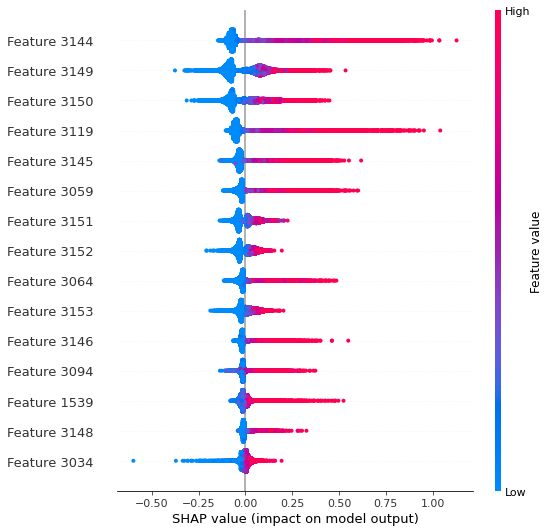

In [9]:
shap.summary_plot(shap_values, X,max_display = 15,show=False)
plt.savefig("xgb_image.png")

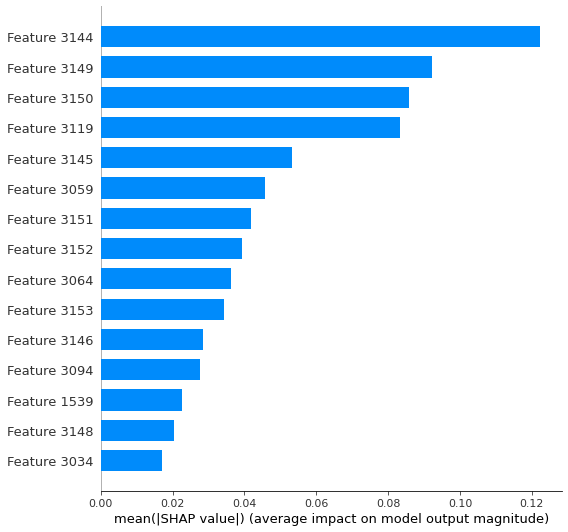

In [10]:
shap.summary_plot(shap_values, X, max_display = 15,show=False,
                  plot_type="bar")
plt.savefig("xgb_image1.png")

In [5]:
#shap_values2 = explainer(X) 

In [6]:
#shap_interaction_values = explainer.shap_interaction_values(X)
#shap.summary_plot(shap_interaction_values, X)

In [5]:
b = np.savetxt("my_xgb_shap/davis_d_xgb_shapvales.txt",shap_values,fmt='%.06f')

In [3]:
davis_d_shapvalues= np.loadtxt("my_xgb_shap/davis_d_xgb_shapvales.txt")
abs = np.maximum(davis_d_shapvalues,-davis_d_shapvalues)
abs

array([[3.08600e-03, 1.55300e-03, 2.47000e-04, ..., 1.11224e-01,
        5.59830e-02, 2.99710e-02],
       [3.13200e-03, 4.33000e-04, 2.30000e-05, ..., 3.73390e-02,
        4.78000e-02, 3.83440e-02],
       [1.06100e-03, 3.76000e-04, 5.92000e-04, ..., 3.47900e-02,
        3.23910e-02, 1.89190e-02],
       ...,
       [1.76000e-04, 2.09000e-04, 5.08000e-04, ..., 3.94650e-02,
        2.73360e-02, 2.51690e-02],
       [7.21800e-03, 9.59000e-04, 1.90000e-05, ..., 4.13770e-02,
        6.48270e-02, 4.13760e-02],
       [1.23100e-03, 1.33000e-04, 5.09000e-04, ..., 3.02040e-02,
        2.60900e-02, 2.34690e-02]])

In [4]:
abs_lie_sum = np.sum(abs,axis =0)
abs_lie_sum

array([ 105.306069,   49.822962,   29.043958, ..., 1046.02081 ,
        983.644982,  860.65795 ])

In [5]:
#数组中的元素排序索引
abs_sum_rank_index = np.argsort(-abs_lie_sum)
abs_sum_rank_index
b = np.savetxt("my_xgb_shap/davis_xgb_d_shapvales_abs_liesum_index.txt",abs_sum_rank_index,fmt='%d')

In [6]:
#数组中的元素排序
abs_sum_rank = np.sort(-abs_lie_sum)
abs_sum_rank1 = np.maximum(abs_sum_rank,-abs_sum_rank)
#abs_sum_rank1
abs_sum_rank1
b = np.savetxt("my_xgb_shap/davis_xgb_d_shapvales_abs_liesum.txt",abs_sum_rank1,fmt='%.03f')